In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk

In [3]:
df = pd.read_csv(r"C:/Users/Yash/Downloads/spam.csv",encoding = "cp1252")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(6776, 5)

In [6]:
data = df.iloc[:,[0,1]]
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...
6772,ham,Will Ì_ b going to esplanade fr home?
6773,ham,"Pity, * was in mood for that. So...any other s..."
6774,ham,The guy did some bitching but I acted like i'd...


In [7]:
data.describe()

,v1,v2
count,6776,6776
unique,2,5165
top,ham,"Sorry, I'll call later"
freq,5854,38


In [8]:
data.rename(columns = {"v1":"label","v2":"message"},inplace = True)

In [9]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.label.value_counts()

ham     5854
spam     922
Name: label, dtype: int64

In [11]:
d1 = data.message.apply(len)
d1

0       111
1        29
2       155
3        49
4        61
       ... 
6771    161
6772     37
6773     57
6774    125
6775     26
Name: message, Length: 6776, dtype: int64

In [12]:
data = pd.concat([data,d1],axis = 1)

In [13]:
data

,label,message,message
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...,161
6772,ham,Will Ì_ b going to esplanade fr home?,37
6773,ham,"Pity, * was in mood for that. So...any other s...",57
6774,ham,The guy did some bitching but I acted like i'd...,125


In [14]:
data.columns.values[2] = "length"

In [15]:
data

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...,161
6772,ham,Will Ì_ b going to esplanade fr home?,37
6773,ham,"Pity, * was in mood for that. So...any other s...",57
6774,ham,The guy did some bitching but I acted like i'd...,125


In [16]:
from nltk.corpus import stopwords

In [17]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
abc = "i want to ? remove !! all the ... punctuation marks $ from %%"
abc_refine = [i for i in abc if i not in string.punctuation]
abc_refine

['i',
 ' ',
 'w',
 'a',
 'n',
 't',
 ' ',
 't',
 'o',
 ' ',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 ' ',
 'a',
 'l',
 'l',
 ' ',
 't',
 'h',
 'e',
 ' ',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'm',
 'a',
 'r',
 'k',
 's',
 ' ',
 ' ',
 'f',
 'r',
 'o',
 'm',
 ' ']

In [21]:
abc_refine = "".join(abc_refine)
abc_refine

'i want to  remove  all the  punctuation marks  from '

In [22]:
aa = abc_refine.split()
aa

['i', 'want', 'to', 'remove', 'all', 'the', 'punctuation', 'marks', 'from']

In [23]:
def text_process(mess):
    '''
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    return[word for word in nopunc.split()if word not in stopwords.words("english")]

In [24]:
data["message"].apply(text_process)


0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, dont, think, goes, usf, lives, around...
                              ...                        
6771    [This, 2nd, time, tried, 2, contact, u, U, å£7...
6772             [Will, Ì, b, going, esplanade, fr, home]
6773                     [Pity, mood, Soany, suggestions]
6774    [The, guy, bitching, I, acted, like, id, inter...
6775                              [Rofl, Its, true, name]
Name: message, Length: 6776, dtype: object

In [26]:
from wordcloud import WordCloud

In [28]:
cloud = WordCloud().generate(str(data["message"]))

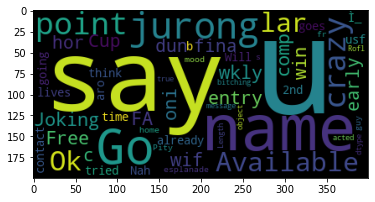

In [29]:
plt.imshow(cloud)

In [31]:
df_ham = data[data.label == "ham"]
df_ham

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77
...,...,...,...
6769,ham,Huh y lei...,12
6772,ham,Will Ì_ b going to esplanade fr home?,37
6773,ham,"Pity, * was in mood for that. So...any other s...",57
6774,ham,The guy did some bitching but I acted like i'd...,125


In [32]:
wc = WordCloud(max_words = 50)

In [42]:
cloud_ham = wc.generate(str(df_ham.message))

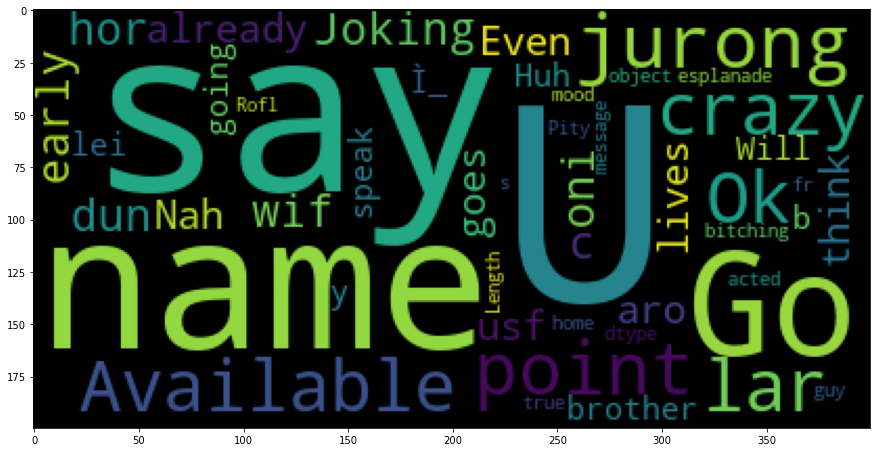

In [43]:
fig = plt.figure(figsize = (15,15))
plt.imshow(cloud_ham)

In [41]:
df_spam = data[data.label == "spam"]
df_spam

,label,message,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136
...,...,...,...
6741,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90
6744,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160
6751,spam,Had your contract mobile 11 Mnths? Latest Moto...,160
6770,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147


In [44]:
cloud_spam = wc.generate(str(df_spam.message))

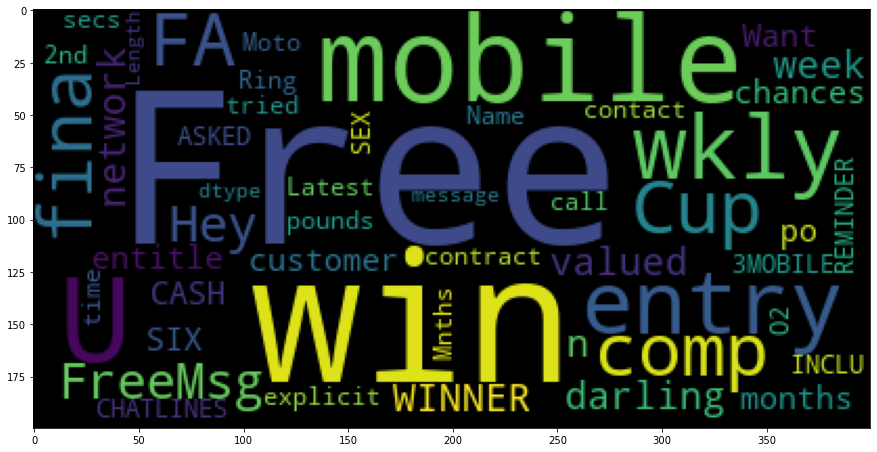

In [45]:
fig = plt.figure(figsize = (15,15))
plt.imshow(cloud_spam)

In [38]:
from sklearn.feature_extraction.text  import CountVectorizer

In [39]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(data["message"])
bow_transformer.vocabulary_

{'Go': 2078,
 'jurong': 7633,
 'point': 8986,
 'crazy': 5863,
 'Available': 1117,
 'bugis': 5314,
 'n': 8408,
 'great': 7023,
 'world': 11219,
 'la': 7744,
 'e': 6309,
 'buffet': 5313,
 'Cine': 1497,
 'got': 6992,
 'amore': 4754,
 'wat': 11021,
 'Ok': 3122,
 'lar': 7777,
 'Joking': 2489,
 'wif': 11128,
 'u': 10758,
 'oni': 8659,
 'Free': 1959,
 'entry': 6422,
 '2': 421,
 'wkly': 11179,
 'comp': 5713,
 'win': 11140,
 'FA': 1855,
 'Cup': 1565,
 'final': 6648,
 'tkts': 10574,
 '21st': 441,
 'May': 2843,
 '2005': 428,
 'Text': 4015,
 '87121': 858,
 'receive': 9320,
 'questionstd': 9227,
 'txt': 10746,
 'rateTCs': 9268,
 'apply': 4832,
 '08452810075over18s': 72,
 'U': 4140,
 'dun': 6296,
 'say': 9621,
 'early': 6314,
 'hor': 7268,
 'c': 5357,
 'already': 4731,
 'Nah': 2993,
 'I': 2321,
 'dont': 6216,
 'think': 10496,
 'goes': 6963,
 'usf': 10857,
 'lives': 7917,
 'around': 4878,
 'though': 10513,
 'FreeMsg': 1961,
 'Hey': 2249,
 'darling': 5958,
 '3': 534,
 'weeks': 11067,
 'word': 11206,
 

In [40]:
len(bow_transformer.vocabulary_)

11480

In [47]:
mess_bow = bow_transformer.transform(data.message)

In [48]:
type(mess_bow)


scipy.sparse.csr.csr_matrix

In [49]:
mess_bow.shape

(6776, 11480)

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer

In [51]:
TT  = TfidfTransformer()

In [52]:
TT.fit(mess_bow)

TfidfTransformer()

In [54]:
TT_mess = TT.transform(mess_bow)
TT_mess

<6776x11480 sparse matrix of type '<class 'numpy.float64'>'
	with 67681 stored elements in Compressed Sparse Row format>

In [55]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [56]:
spam_nb = nb.fit(TT_mess,data.label)
spam_nb

MultinomialNB()

In [57]:
pre_spam = nb.predict(TT_mess)

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [60]:
cf = confusion_matrix(pre_spam,data.label)
cf

array([[5854,   95],
       [   0,  827]], dtype=int64)

In [61]:
acc = cf.diagonal().sum()/cf.sum()*100
acc

98.59799291617473

In [62]:
print(classification_report(pre_spam,data.label))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      5949
        spam       0.90      1.00      0.95       827

    accuracy                           0.99      6776
   macro avg       0.95      0.99      0.97      6776
weighted avg       0.99      0.99      0.99      6776



In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [64]:
rf.fit(TT_mess,data.label)

RandomForestClassifier()

In [65]:
pre_rf = rf.predict(TT_mess)

In [66]:
cf1 = confusion_matrix(pre_rf, data.label)
cf1

array([[5854,    0],
       [   0,  922]], dtype=int64)

In [68]:
acc1 = cf1.diagonal().sum()/cf1.sum()*100
acc1


100.0

In [69]:
print(classification_report(pre_rf,data.label))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      5854
        spam       1.00      1.00      1.00       922

    accuracy                           1.00      6776
   macro avg       1.00      1.00      1.00      6776
weighted avg       1.00      1.00      1.00      6776

